In [1]:
# import libraries
import pandas as pd
import numpy as np

# imported created player csv
df = pd.read_csv("players_complete_encoded.csv")

# display all columns
pd.set_option('display.max_columns', None)

#view data
df.head()

,round,player_name_id_x,date,total_points,assists,bonus,clean_sheets,goals_conceded,goals_scored,minutes,own_goals,red_cards,yellow_cards,shots,xG,xA,key_passes,xGChain,xGBuildup,conceded,xG_team,xGA,scored,missed,pts,conceded_team,rolling_team_pts,diff_team_xG,diff_team_xGA,diff_team_scored,diff_team_missed,diff_team_conceded,diff_team_pts,attack_overall,defence_overall,attack_difficulty,defence_difficulty,opposition_attack_difficulty,opposition_defence_difficulty,cum_assists,cum_bonus,cum_clean_sheets,cum_goals_conceded,cum_goals_scored,cum_minutes,cum_own_goals,cum_red_cards,cum_yellow_cards,cum_shots,cum_xG,cum_xA,cum_key_passes,cum_xGChain,cum_xGBuildup,cum_conceded,rolling_assists,rolling_bonus,rolling_clean_sheets,rolling_goals_conceded,rolling_goals_scored,rolling_minutes,rolling_shots,rolling_xG,rolling_xA,rolling_key_passes,rolling_xGChain,rolling_xGBuildup,rolling_conceded,diff_assists,diff_bonus,diff_clean_sheets,diff_goals_conceded,diff_goals_scored,diff_minutes,diff_shots,diff_xG,diff_xA,diff_key_passes,diff_xGChain,diff_xGBuildup,diff_conceded,team_name_Arsenal,team_name_Aston Villa,team_name_Brentford,team_name_Brighton,team_name_Burnley,team_name_Chelsea,team_name_Crystal Palace,team_name_Everton,team_name_Leeds,team_name_Leicester,team_name_Liverpool,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Southampton,team_name_Tottenham,team_name_Watford,team_name_West Ham,team_name_Wolverhampton Wanderers,position_def,position_fwd,position_mid,h_a_a,h_a_h,opponent_team_Arsenal,opponent_team_Aston Villa,opponent_team_Brentford,opponent_team_Brighton,opponent_team_Burnley,opponent_team_Chelsea,opponent_team_Crystal Palace,opponent_team_Everton,opponent_team_Leeds,opponent_team_Leicester,opponent_team_Liverpool,opponent_team_Manchester City,opponent_team_Manchester United,opponent_team_Newcastle United,opponent_team_Norwich,opponent_team_Southampton,opponent_team_Tottenham,opponent_team_Watford,opponent_team_West Ham,opponent_team_Wolverhampton Wanderers,penalty_taker_no,penalty_taker_yes
0,7,Aaron_Cresswell_411,2021-10-03,1.0,0.0,0.0,0.0,1.0,0.0,4.51086,0.0,0.0,0.0,2.0,0.072747,0.081314,2.0,0.125092,0.026788,1.0,1.98962,1.196700,2.0,1.0,3.0,1.0,1.6,-0.203954,-0.096512,-0.4,-0.2,-0.2,0.0,2.223147,2.417515,4.0,3.0,2.0,1.0,0.693147,1.386294,0.693147,2.197225,0.693147,6.293419,0.0,0.0,0.0,2.079442,0.264735,0.298953,2.197225,0.973384,0.821719,2.197225,0.2,0.6,0.2,1.2,0.0,4.51086,1.0,0.044022,0.062108,1.4,0.220426,0.154921,1.2,0.0,0.0,0.0,-0.2,-0.2,0.0,0.0,-0.002046,0.008681,0.2,-0.083933,-0.094603,-0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8,Aaron_Cresswell_411,2021-10-17,7.0,0.0,0.0,0.0,2.0,0.0,4.51086,0.0,0.0,0.0,0.0,0.000000,0.179279,3.0,0.260993,0.189291,2.0,1.37258,1.300980,1.0,2.0,0.0,2.0,1.0,-0.182710,0.134844,-0.6,0.2,0.2,-0.6,1.240437,2.752359,3.0,3.0,4.0,4.0,0.693147,1.386294,0.693147,2.397895,0.693147,6.447306,0.0,0.0,0.0,2.079442,0.264735,0.423780,2.484907,1.067424,0.901663,2.397895,0.2,0.6,0.2,1.4,0.0,4.51086,0.8,0.034143,0.097963,2.0,0.227865,0.148019,1.4,0.0,0.0,0.0,0.2,0.0,0.0,-0.2,-0.009879,0.035856,0.6,0.007439,-0.006902,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,9,Aaron_Cresswell_411,2021-10-24,12.0,0.0,1.0,1.0,0.0,0.0,4.51086,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.044315,0.044315,0.0,2.03034,0.854165,1.0,0.0,3.0,0.0,1.4,0.116572,-0.164483,-0.2,-0.4,-0.4,0.4,1.557009,2.187876,3.0,4.0,3.0,3.0,0.693147,1.609438,1.098612,2.397895,0.693147,6.580639,0.0,0.0,0.0,2.079442,0.264735,0.423780,2.484907,1.082549,0.919490,2.397895,0.0,0.6,0.4,1.0,0.0,4.51086,0.8,0.034143,0.079456,1.8,0.175218,0.113879,1.0,-0.2,0.0,0.2,-0.4,0.0,0.0,0.0,0.000000,-0.018508,-0.2,-0.052647,-0.034140,-0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,10,Aaron_Cresswell_411,2021-10-31,2.0,1.0,3.0,1.0,0.0,0.0,4.51086,0

Once again split data into train and test datasets based on final five games of the season.

In [2]:
# update round dtype
df['round'] = df['round'].astype(object)

# create test/train datasets
test_df = df[df['round'].isin([34, 35, 36, 37, 38])]
train_df = df[~df['round'].isin([34, 35, 36, 37, 38])]

print(train_df.shape)
print(test_df.shape)

(5334, 128)
(1354, 128)


In [3]:
# define values required for model
X_tr = train_df.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).values
y_tr = train_df['total_points'].values

# define values required for model
X_te = test_df.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).values
y_te = test_df['total_points'].values

*Decision Tree*

Using decision tree and random forests in order to capture the likely non-linearity within the data. 

Start by tuning the depth of the model with grid search cross validation iterating over 10 tree depths to find opportune level.

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# decision tree with unspecified depth
dt = DecisionTreeRegressor(criterion="absolute_error", random_state=0)

# Create cross-validation object
grid = {"max_depth": range(1,10)}
grid_cv = GridSearchCV(dt, grid, cv=5, return_train_score=True, verbose=1, n_jobs=-1)

grid_cv.fit(X_tr, y_tr)

# Collect results in a DataFrame
cv_results = pd.DataFrame(grid_cv.cv_results_)

# Print a few interesting columns
cols = [
    "mean_test_score",
    "std_test_score",
    "mean_train_score",
    "std_train_score",
    "param_max_depth",
]
cv_results[cols].sort_values("mean_test_score", ascending=False)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,mean_test_score,std_test_score,mean_train_score,std_train_score,param_max_depth
1,-0.110149,0.027073,-0.101200,0.009226,2
2,-0.118027,0.054434,-0.071731,0.005245,3
3,-0.137415,0.037634,-0.042487,0.007626,4
0,-0.145697,0.012059,-0.145085,0.001973,1
4,-0.163652,0.021986,-0.018111,0.008704,5
5,-0.183920,0.042312,0.008228,0.007634,6
7,-0.202128,0.059071,0.077571,0.014540,8
6,-0.209295,0.049119,0.046409,0.010116,7
8,-0.220718,0.046101,0.110978,0.017080,9


Now plot train and validation curves

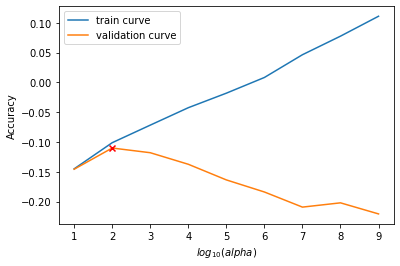

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot each curve plus the point of optimal value alpha
plt.plot(cv_results['param_max_depth'], cv_results["mean_train_score"], label="train curve")
plt.plot(cv_results['param_max_depth'], cv_results["mean_test_score"], label="validation curve")

plt.scatter(grid_cv.best_params_['max_depth'], grid_cv.best_score_, marker="x", c="red", zorder=10)

plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

All model depths performing poorly (negative test score suggesting mean baseline performs better). Increase in depth just creates overfitting and leads to a worse performance on the validation set.

Interested to see which features the model is choosing and view the plot tree for the small depth.

In [6]:
# set max depth to best level from above
dt = DecisionTreeRegressor(criterion="absolute_error", max_depth=grid_cv.best_params_['max_depth'], random_state=0)

# Fit it to train data
dt.fit(X_tr, y_tr)

# identify features 
importances = dt.feature_importances_

# create a DataFrame with the feature importances sorted by relevance
df_importances = pd.DataFrame({'Feature': df.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).columns, 'Importances' : importances})
df_importances.sort_values('Importances', ascending=False).head(10)

,Feature,Importances
5,minutes,0.516588
48,cum_xGChain,0.374408
75,diff_xGBuildup,0.109005
85,team_name_Leeds,0.000000
80,team_name_Brighton,0.000000
81,team_name_Burnley,0.000000
82,team_name_Chelsea,0.000000
83,team_name_Crystal Palace,0.000000
84,team_name_Everton,0.000000
86,team_name_Leicester,0.000000


Whats interesting about the features here is that its identified what I'd expect to have high influence on expected points but obviously the data is too complex to capture overall:
- Minutes in previous game should be useful starting point. > 60 minutes means player is likely to play majority of the game and there isa high correlation between minutes and expected points.
- difference in team xG of previous game could suggest team player plays for a team going into form and attack overall a more general view of team quality
- model has also identified key characteristics of defenders (position_def) & gk (cum_saves & rolling saves)

Its not suprising the model is finding it difficult due to this.

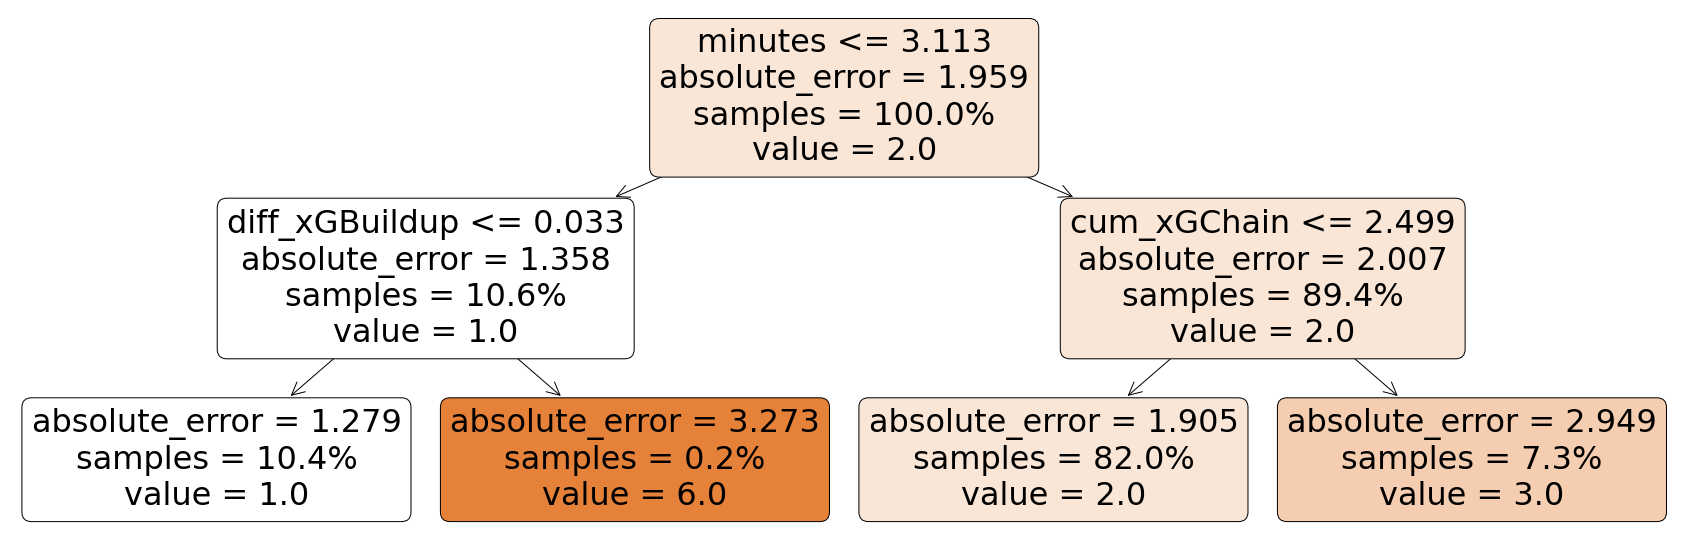

In [7]:
# import libraries
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import plot_tree

# identify paramter columns
columns = train_df.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).columns

# plot decision tree
plt.figure(figsize=(30, 10))
plot_tree(
    dt,
    filled=True,
    rounded=True,
    feature_names=columns,
    proportion=True,
    
)
plt.show()

The model has 78% of samples reaching a value of ~2 which is ultimately quite a good measure of performance (playing > 60 mins gets a player 2 points). However, the way in which it reaches is simply looking at team performance but then only finding out if its a goalie or not and predicting 2 points which is lesss than ideal.

In [8]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

# review prediction quality
y_pred_dt = dt.predict(X_te)

mae_tuned_dt = MAE(y_te, y_pred_dt)
r2_tuned_dt = r2_score(y_te, y_pred_dt)

print("MAE decision tree regression model {}".format(mae_tuned_dt))
print("R squared decision tree regression model {}".format(r2_tuned_dt))

MAE decision tree regression model 1.9158050221565732
R squared decision tree regression model -0.0817237510700477


In [38]:
# import library
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_te_rescaled = scaler.transform(X_te)

# Create PCA transformer
pca = PCA(n_components=42) 

    # Apply PCA and transform data X
X_tr_pca = pca.fit_transform(X_tr)
X_te_pca = pca.transform(X_te)

42


In [10]:
# decision tree with unspecified depth
dt = DecisionTreeRegressor(criterion="absolute_error", random_state=0)

# Create cross-validation object
grid = {"max_depth": range(1,10)}
grid_cv = GridSearchCV(dt, grid, cv=5, return_train_score=True, verbose=1, n_jobs=-1)

grid_cv.fit(X_tr_pca, y_tr)

# Collect results in a DataFrame
cv_results = pd.DataFrame(grid_cv.cv_results_)

# Print a few interesting columns
cols = [
    "mean_test_score",
    "std_test_score",
    "mean_train_score",
    "std_train_score",
    "param_max_depth",
]
cv_results[cols].sort_values("mean_test_score", ascending=False)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,mean_test_score,std_test_score,mean_train_score,std_train_score,param_max_depth
0,-0.120918,0.021721,-0.110562,0.012405,1
1,-0.143178,0.021060,-0.116290,0.009087,2
2,-0.144068,0.020473,-0.099389,0.008302,3
3,-0.167751,0.049546,-0.072532,0.012042,4
4,-0.195960,0.059389,-0.043554,0.018638,5
5,-0.213940,0.071114,-0.015986,0.026121,6
7,-0.222401,0.058693,0.025003,0.028886,8
6,-0.223296,0.037775,0.006471,0.027624,7
8,-0.228090,0.059439,0.044931,0.031080,9


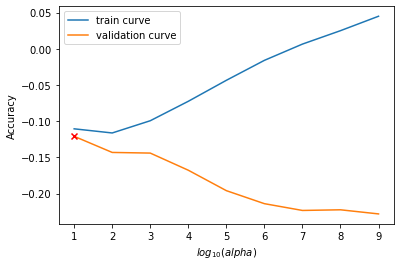

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot each curve plus the point of optimal value alpha
plt.plot(cv_results['param_max_depth'], cv_results["mean_train_score"], label="train curve")
plt.plot(cv_results['param_max_depth'], cv_results["mean_test_score"], label="validation curve")

plt.scatter(grid_cv.best_params_['max_depth'], grid_cv.best_score_, marker="x", c="red", zorder=10)

plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
# set max depth to best level from above
dt = DecisionTreeRegressor(criterion="absolute_error", max_depth=grid_cv.best_params_['max_depth'], random_state=0)

# Fit it to train data
dt.fit(X_tr_pca, y_tr)

# review prediction quality
y_pred_pca_dt = dt.predict(X_te_pca)

mae_pca_tuned_dt = MAE(y_te, y_pred_pca_dt)
r2_pca_tuned_dt = r2_score(y_te, y_pred_pca_dt)

print("MAE decision tree pca regression model {}".format(mae_tuned_dt))
print("R squared decision tree pca regression model {}".format(r2_tuned_dt))

MAE decision tree pca regression model 1.9158050221565732
R squared decision tree pca regression model -0.0817237510700477


In [13]:
df_results = pd.DataFrame(index=[0])
df_results['DT_mae'] = mae_tuned_dt
df_results['DT_r2'] = r2_tuned_dt
df_results['DT_pca_mae'] = mae_pca_tuned_dt
df_results['DT_pca_r2'] = r2_pca_tuned_dt
df_results

,DT_mae,DT_r2,DT_pca_mae,DT_pca_r2
0,1.915805,-0.081724,1.903988,-0.132138


*Random Forest*

Running over 3 CVs due to processing power of computer

In [14]:
# import library
from sklearn.ensemble import RandomForestRegressor

# create classifier
rf = RandomForestRegressor(random_state=0)

# create grids for CV
grids = [{
    "n_estimators": range(1,50),
    "max_depth": range(1,10)}
]

# create object
grid_cv = GridSearchCV(rf, grids, cv=3, return_train_score=True, verbose=1, n_jobs=-1)

# fit to train data
grid_cv.fit(X_tr, y_tr)

# Collect results in a DataFrame
cv_results = pd.DataFrame(grid_cv.cv_results_)

# Print selected columns
cols = [
    "mean_test_score",
    "std_test_score",
    "mean_train_score",
    "std_train_score",
    "param_n_estimators",
    "param_max_depth"
]
cv_results[cols].sort_values("mean_test_score", ascending=False)

Fitting 3 folds for each of 441 candidates, totalling 1323 fits


,mean_test_score,std_test_score,mean_train_score,std_train_score,param_n_estimators,param_max_depth
286,0.054805,0.017345,0.258460,0.010500,42,6
285,0.054308,0.017050,0.258744,0.010157,41,6
287,0.054064,0.017045,0.258984,0.011165,43,6
284,0.054014,0.016908,0.258323,0.009959,40,6
293,0.053587,0.016723,0.258645,0.012834,49,6
...,...,...,...,...,...,...
245,-0.140438,0.081052,0.102963,0.024808,1,6
393,-0.167237,0.074898,0.270537,0.017924,2,9
294,-0.201124,0.082360,0.116564,0.035173,1,7
343,-0.299508,0.103909,0.132660,0.015554,1,8


Table above shows that the performance improvies with a higher the amount of decision trees available to use (n_estimators). Only issue here is the computing power required to run.

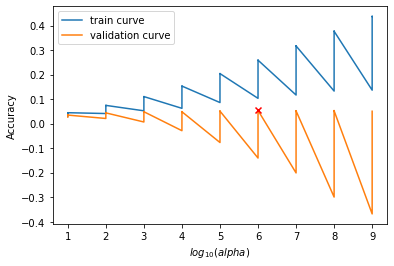

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot each curve plus the point of optimal value alpha
plt.plot(cv_results['param_max_depth'], cv_results["mean_train_score"], label="train curve")
plt.plot(cv_results['param_max_depth'], cv_results["mean_test_score"], label="validation curve")

plt.scatter(grid_cv.best_params_['max_depth'], grid_cv.best_score_, marker="x", c="red", zorder=10)

plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [16]:
# create tuned classifer using best results 
rf = RandomForestRegressor(n_estimators=grid_cv.best_params_['n_estimators'], max_depth=grid_cv.best_params_['max_depth'], random_state=0)

# fit to train data
rf.fit(X_tr, y_tr)

# create predictions
y_pred_rf = rf.predict(X_te)

mae_tuned_rf = MAE(y_te, y_pred_rf)
r2_tuned_rf = r2_score(y_te, y_pred_rf)

print("MAE random forest regression model {}".format(mae_tuned_rf))
print("R squared random forest regression model {}".format(r2_tuned_rf))

MAE random forest regression model 2.319647191101884
R squared random forest regression model 0.05731759429554595


In [17]:
importances = rf.feature_importances_

# create a DataFrame with the feature importances
df_importances = pd.DataFrame({'Feature': df.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).columns, 'Importances' : np.round(importances, 3)})
df_importances = df_importances.sort_values('Importances', ascending=False)
df_importances.head(10)

,Feature,Importances
48,cum_xGChain,0.110
29,attack_overall,0.068
59,rolling_xA,0.057
45,cum_xG,0.042
61,rolling_xGChain,0.032
44,cum_shots,0.025
62,rolling_xGBuildup,0.024
46,cum_xA,0.023
58,rolling_xG,0.022
56,rolling_minutes,0.021


The random forest most important features are similar to the original decision tree, however it demonstrates that its able to filter out the less useful positional specific variables that do not relate to all players.

In [37]:
# import library
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize features
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_te_rescaled = scaler.transform(X_te)

# Create PCA transformer
pca = PCA(n_components=42) 

    # Apply PCA and transform data X
X_tr_pca = pca.fit_transform(X_tr)
X_val_pca = pca.transform(X_te)

42


In [19]:
# import library
from sklearn.ensemble import RandomForestRegressor

# create classifier
rf = RandomForestRegressor(random_state=0)

# create grids for CV
grids = [{
    "n_estimators": range(1,50),
    "max_depth": range(1,10)}
]

# create object
grid_cv = GridSearchCV(rf, grids, cv=3, return_train_score=True, verbose=1, n_jobs=-1)

# fit to train data
grid_cv.fit(X_tr_pca, y_tr)

# Collect results in a DataFrame
cv_results = pd.DataFrame(grid_cv.cv_results_)

# Print selected columns
cols = [
    "mean_test_score",
    "std_test_score",
    "mean_train_score",
    "std_train_score",
    "param_n_estimators",
    "param_max_depth"
]
cv_results[cols].sort_values("mean_test_score", ascending=False)

Fitting 3 folds for each of 441 candidates, totalling 1323 fits


,mean_test_score,std_test_score,mean_train_score,std_train_score,param_n_estimators,param_max_depth
195,0.036232,0.012815,0.139186,0.014260,49,4
191,0.035944,0.013030,0.138772,0.013926,45,4
192,0.035923,0.012816,0.139240,0.013726,46,4
194,0.035824,0.012822,0.139295,0.014154,48,4
189,0.035823,0.013852,0.138466,0.013924,43,4
...,...,...,...,...,...,...
245,-0.158957,0.052195,0.064189,0.015649,1,6
393,-0.170694,0.005382,0.276659,0.006877,2,9
294,-0.206840,0.039817,0.075336,0.030226,1,7
343,-0.264934,0.051699,0.095825,0.025639,1,8


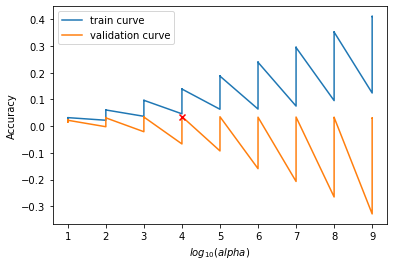

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot each curve plus the point of optimal value alpha
plt.plot(cv_results['param_max_depth'], cv_results["mean_train_score"], label="train curve")
plt.plot(cv_results['param_max_depth'], cv_results["mean_test_score"], label="validation curve")

plt.scatter(grid_cv.best_params_['max_depth'], grid_cv.best_score_, marker="x", c="red", zorder=10)

plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [21]:
# create tuned classifer using best results 
rf = RandomForestRegressor(n_estimators=grid_cv.best_params_['n_estimators'], max_depth=grid_cv.best_params_['max_depth'], random_state=0)

# fit to train data
rf.fit(X_tr_pca, y_tr)

# create predictions
y_pred_pca_rf = rf.predict(X_te_pca)

mae_pca_tuned_rf = MAE(y_te, y_pred_pca_rf)
r2_pca_tuned_rf = r2_score(y_te, y_pred_pca_rf)

print("MAE decision tree pca regression model {}".format(mae_pca_tuned_rf))
print("R squared decision tree pca regression model {}".format(r2_pca_tuned_rf))

MAE decision tree pca regression model 2.3107525370731716
R squared decision tree pca regression model 0.039873577940296334


Reviewing decision tree results for the data that is subsetted by position indicated improved error performance but complexity still not captured and variance capture in R2 lower. Now see if PCA can improve this.

PCA has hindered performance

In [22]:
data = {'dt': [mae_tuned_dt, r2_tuned_dt],
        'dt_pca': [mae_pca_tuned_dt, r2_pca_tuned_dt],
        'rf': [mae_tuned_rf, r2_tuned_rf],
        'rf_pca': [mae_pca_tuned_rf, r2_pca_tuned_rf]
       }

df_results = pd.DataFrame(data, index=['mae', 'r2'])
df_results

,dt,dt_pca,rf,rf_pca
mae,1.915805,1.903988,2.319647,2.310753
r2,-0.081724,-0.132138,0.057318,0.039874


In [23]:
perf = pd.read_csv("model_performance.csv", index_col=0)
perf

,mean_baseline,lr,lr_pca,ridge,ridge_pca
mae,2.324125,2.216105,2.222629,2.200146,2.226867
r2,0.000000,0.078383,0.082675,0.094873,0.083737


In [24]:
df_perf = pd.concat([perf, df_results], axis=1)

In [25]:
df_perf

,mean_baseline,lr,lr_pca,ridge,ridge_pca,dt,dt_pca,rf,rf_pca
mae,2.324125,2.216105,2.222629,2.200146,2.226867,1.915805,1.903988,2.319647,2.310753
r2,0.000000,0.078383,0.082675,0.094873,0.083737,-0.081724,-0.132138,0.057318,0.039874


In [26]:
df_perf.to_csv("model_performance.csv")

In [27]:
data = {'dt_predictions': y_pred_dt,
       'rf_predictions': y_pred_rf}

df_pred = pd.DataFrame(data)

In [28]:
pred = pd.read_csv("model_predictions.csv")
pred

,lr_predictions,ridge_predictions
0,2.957164,2.908680
1,3.073863,3.156424
2,4.185313,3.996022
3,2.527476,2.886356
4,3.352183,3.316586
...,...,...
1349,2.358287,2.441308
1350,2.448863,2.873408
1351,2.248729,2.545411
1352,4.012293,3.621479


In [29]:
df_pred = pd.concat([pred, df_pred], axis=1)
df_pred.to_csv("model_predictions.csv", index=False)

*Results/Predictions*

*Positional subsets*

In [33]:
mae_posn_dt = []
r2_posn_dt = []
pred_posn_dt = []

mae_posn_pca_dt = []
r2_posn_pca_dt = []
pred_posn_pca_dt = []

for x in ['def', 'mid', 'fwd']:
    
    train_posn = train_df[train_df['position_{}'.format(x)]==1]
    test_posn = test_df[test_df['position_{}'.format(x)]==1]
    
    # define values required for model
    X_tr_posn = train_posn.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).values
    y_tr_posn = train_posn['total_points'].values 
    
    X_te_posn = test_posn.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).values
    y_te_posn = test_posn['total_points'].values     
    
    # decision tree with unspecified depth
    dt = DecisionTreeRegressor(criterion="absolute_error", random_state=0)

    # Create cross-validation object
    grid = {"max_depth": range(1,10)}
    grid_cv = GridSearchCV(dt, grid, cv=3, return_train_score=True, verbose=1)

    grid_cv.fit(X_tr_posn, y_tr_posn)
    
    dt_tuned = DecisionTreeRegressor(criterion="absolute_error", max_depth=grid_cv.best_params_['max_depth'], random_state=0)

    # Fit it to train data
    dt_tuned.fit(X_tr_posn, y_tr_posn)
        
    y_pred = dt_tuned.predict(X_te_posn)
    mae = MAE(y_te_posn, y_pred)
    r2 = r2_score(y_te_posn, y_pred) 
    
    mae_posn_dt.append(mae)
    r2_posn_dt.append(r2)
    pred_posn_dt.append(y_pred)
        
    # pca 
    
    # Standardize features
    scaler = StandardScaler()
    X_tr_posn_rescaled = scaler.fit_transform(X_tr_posn)
    X_te_posn_rescaled = scaler.transform(X_te_posn)

    pca = PCA(n_components=None)

    # Fit PCA to the data
    pca.fit(X_tr_posn_rescaled)

    var_cumsum = np.cumsum(pca.explained_variance_ratio_)

    n = np.argmax(var_cumsum >= 0.75) + 1   
    
    # Create PCA transformer
    pca = PCA(n_components=n) 

    # Apply PCA and transform data X
    X_tr_posn_pca = pca.fit_transform(X_tr_posn_rescaled)
    X_te_posn_pca = pca.transform(X_te_posn_rescaled)
    
    # decision tree with unspecified depth
    dt = DecisionTreeRegressor(criterion="absolute_error", random_state=0)

    # Create cross-validation object
    grid = {"max_depth": range(1,10)}
    grid_cv = GridSearchCV(dt, grid, cv=3, return_train_score=True, verbose=1)

    grid_cv.fit(X_tr_posn_pca, y_tr_posn)
    
    dt_tuned = DecisionTreeRegressor(criterion="absolute_error", max_depth=grid_cv.best_params_['max_depth'], random_state=0)

    # Fit it to train data
    dt_tuned.fit(X_tr_posn_pca, y_tr_posn)
        
    y_pred = dt_tuned.predict(X_te_posn_pca)
    mae = MAE(y_te_posn, y_pred)
    r2 = r2_score(y_te_posn, y_pred) 
    
    mae_posn_pca_dt.append(mae)
    r2_posn_pca_dt.append(r2)
    pred_posn_pca_dt.append(y_pred)   

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [41]:
mae_dt = []
r2_dt = []
pred_dt = []

mae_pca_dt = []
r2_pca_dt = []
pred_pca_dt = []

for x in ['def', 'mid', 'fwd']:

    test_posn = test_df[test_df['position_{}'.format(x)]==1]
    
    X_te_posn = test_posn.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).values
    y_te_posn = test_posn['total_points'].values     
    
    # use tuned trained parameters
    dt_tuned = DecisionTreeRegressor(criterion="absolute_error", max_depth=2, random_state=0)

    # Fit it to full train data
    dt_tuned.fit(X_tr, y_tr)
    
    # return performance scores
    y_pred = dt_tuned.predict(X_te_posn)
    mae = MAE(y_te_posn, y_pred)
    r2 = r2_score(y_te_posn, y_pred) 
    
    mae_dt.append(mae)
    r2_dt.append(r2)
    pred_dt.append(y_pred)
        
    # pca 
    # Standardize features
    scaler = StandardScaler()
    X_tr_rescaled = scaler.fit_transform(X_tr)
    X_te_posn_rescaled = scaler.transform(X_te_posn)

    # Create PCA transformer
    pca = PCA(n_components=42) 

    # Apply PCA and transform data X
    X_tr_pca = pca.fit_transform(X_tr_rescaled)
    X_te_posn_pca = pca.transform(X_te_posn_rescaled)
    
    dt_tuned = DecisionTreeRegressor(criterion="absolute_error", max_depth=1, random_state=0)

    # Fit it to train data
    dt_tuned.fit(X_tr_pca, y_tr)
        
    y_pred = dt_tuned.predict(X_te_posn_pca)
    mae = MAE(y_te_posn, y_pred)
    r2 = r2_score(y_te_posn, y_pred) 
    
    mae_pca_dt.append(mae)
    r2_pca_dt.append(r2)
    pred_pca_dt.append(y_pred) 

In [60]:
mae_posn_rf = []
r2_posn_rf = []
pred_posn_rf = []

mae_posn_pca_rf = []
r2_posn_pca_rf = []
pred_posn_pca_rf = []

for x in ['def', 'mid', 'fwd']:
    
    train_posn = train_df[train_df['position_{}'.format(x)]==1]
    test_posn = test_df[test_df['position_{}'.format(x)]==1]
    
    # define values required for model
    X_tr_posn = train_posn.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).values
    y_tr_posn = train_posn['total_points'].values 
    
    X_te_posn = test_posn.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).values
    y_te_posn = test_posn['total_points'].values     
    
    # create classifier
    rf = RandomForestRegressor(random_state=0)

    # create grids for CV
    grids = [{
        "n_estimators": range(1,50),
        "max_depth": range(1,10)}
    ]

    # create object
    grid_cv = GridSearchCV(rf, grids, cv=3, return_train_score=True, verbose=1, n_jobs=-1)

    # fit to train data
    grid_cv.fit(X_tr_posn, y_tr_posn)
    
    # create tuned classifer using best results 
    rf_tuned = RandomForestRegressor(n_estimators=grid_cv.best_params_['n_estimators'], max_depth=grid_cv.best_params_['max_depth'], random_state=0)

    # fit to train data
    rf_tuned.fit(X_tr_posn, y_tr_posn)
     
    y_pred = rf_tuned.predict(X_te_posn)
    mae = MAE(y_te_posn, y_pred)
    r2 = r2_score(y_te_posn, y_pred) 
    
    mae_posn_rf.append(mae)
    r2_posn_rf.append(r2)
    pred_posn_rf.append(y_pred)
     
    
    # pca 
    # Standardize features
    scaler = StandardScaler()
    X_tr_posn_rescaled = scaler.fit_transform(X_tr_posn)
    X_te_posn_rescaled = scaler.transform(X_te_posn)

    pca = PCA(n_components=None)

    # Fit PCA to the data
    pca.fit(X_tr_posn_rescaled)

    var_cumsum = np.cumsum(pca.explained_variance_ratio_)

    n = np.argmax(var_cumsum >= 0.75) + 1   
    
    # Create PCA transformer
    pca = PCA(n_components=n) 

    # Apply PCA and transform data X
    X_tr_posn_pca = pca.fit_transform(X_tr_posn_rescaled)
    X_te_posn_pca = pca.transform(X_te_posn_rescaled)

    # fit to train data
    grid_cv.fit(X_tr_posn_pca, y_tr_posn)
    
    # create tuned classifer using best results 
    rf_tuned = RandomForestRegressor(n_estimators=grid_cv.best_params_['n_estimators'], max_depth=grid_cv.best_params_['max_depth'], random_state=0)

    # fit to train data
    rf_tuned.fit(X_tr_posn_pca, y_tr_posn)
       
    y_pred = rf_tuned.predict(X_te_posn_pca)
    mae = MAE(y_te_posn, y_pred)
    r2 = r2_score(y_te_posn, y_pred) 
    
    mae_posn_pca_rf.append(mae)
    r2_posn_pca_rf.append(r2)
    pred_posn_pca_rf.append(y_pred)

Fitting 3 folds for each of 441 candidates, totalling 1323 fits
Fitting 3 folds for each of 441 candidates, totalling 1323 fits
Fitting 3 folds for each of 441 candidates, totalling 1323 fits
Fitting 3 folds for each of 441 candidates, totalling 1323 fits
Fitting 3 folds for each of 441 candidates, totalling 1323 fits
Fitting 3 folds for each of 441 candidates, totalling 1323 fits


In [61]:
mae_rf = []
r2_rf = []
pred_rf = []

mae_pca_rf = []
r2_pca_rf = []
pred_pca_rf = []

for x in ['def', 'mid', 'fwd']:
    
    test_posn = test_df[test_df['position_{}'.format(x)]==1]
    
    X_te_posn = test_posn.drop(["player_name_id_x", "date", "round", "total_points"], axis=1).values
    y_te_posn = test_posn['total_points'].values     

    # create tuned classifer using best results 
    rf_tuned = RandomForestRegressor(n_estimators=42, max_depth=6, random_state=0)

    # fit to train data
    rf_tuned.fit(X_tr, y_tr)
     
    y_pred = rf_tuned.predict(X_te_posn)
    mae = MAE(y_te_posn, y_pred)
    r2 = r2_score(y_te_posn, y_pred) 
    
    mae_rf.append(mae)
    r2_rf.append(r2)
    pred_rf.append(y_pred)
    
    # Standardize features
    scaler = StandardScaler()
    X_tr_rescaled = scaler.fit_transform(X_tr)
    X_te_posn_rescaled = scaler.transform(X_te_posn)
    
    # Create PCA transformer
    pca = PCA(n_components=42) 

    # Apply PCA and transform data X
    X_tr_pca = pca.fit_transform(X_tr_rescaled)
    X_te_posn_pca = pca.transform(X_te_posn_rescaled)
    
    rf_tuned = RandomForestRegressor(n_estimators=49, max_depth=4, random_state=0)

    # Fit it to train data
    rf_tuned.fit(X_tr_pca, y_tr)
        
    y_pred = rf_tuned.predict(X_te_posn_pca)
    mae = MAE(y_te_posn, y_pred)
    r2 = r2_score(y_te_posn, y_pred) 
    
    mae_pca_rf.append(mae)
    r2_pca_rf.append(r2)
    pred_pca_rf.append(y_pred) 
    

In [62]:
defenders = {'dt_posn': [mae_posn_dt[0], r2_posn_dt[0]],
        'dt_posn_pca': [mae_posn_pca_dt[0], r2_posn_pca_dt[0]],     
        'dt_full': [mae_dt[0], r2_dt[0]],
        'dt_full_pca': [mae_pca_dt[0], r2_pca_dt[0]],                    
        'rf_posn': [mae_posn_rf[0], r2_posn_rf[0]],
        'rf_posn_pca': [mae_posn_pca_rf[0], r2_posn_pca_rf[0]],     
        'rf_full': [mae_rf[0], r2_rf[0]],
        'rf_full_pca': [mae_pca_rf[0], r2_pca_rf[0]],
       }

df_def_results = pd.DataFrame(defenders, index=['mae', 'r2'])
df_def_results

,dt_posn,dt_posn_pca,dt_full,dt_full_pca,rf_posn,rf_posn_pca,rf_full,rf_full_pca
mae,2.256000,2.16400,2.136000,2.1320,2.516234,2.413552,2.444421,2.430559
r2,-0.075636,-0.08423,-0.055438,-0.0679,0.036688,0.067677,0.063436,0.059695


In [63]:
midfielders = {'dt_posn': [mae_posn_dt[1], r2_posn_dt[1]],
        'dt_posn_pca': [mae_posn_pca_dt[1], r2_posn_pca_dt[1]],     
        'dt_full': [mae_dt[1], r2_dt[1]],
        'dt_full_pca': [mae_pca_dt[1], r2_pca_dt[1]],                    
        'rf_posn': [mae_posn_rf[1], r2_posn_rf[1]],
        'rf_posn_pca': [mae_posn_pca_rf[1], r2_posn_pca_rf[1]],     
        'rf_full': [mae_rf[1], r2_rf[1]],
        'rf_full_pca': [mae_pca_rf[1], r2_pca_rf[1]],
       }

df_mid_results = pd.DataFrame(midfielders, index=['mae', 'r2'])
df_mid_results

,dt_posn,dt_posn_pca,dt_full,dt_full_pca,rf_posn,rf_posn_pca,rf_full,rf_full_pca
mae,1.645455,1.675758,1.706061,1.663636,2.057169,2.048199,2.155282,2.066629
r2,-0.084795,-0.021532,-0.081584,-0.034056,0.072002,0.083811,0.045779,0.066694


In [64]:
forwards = {'dt_posn': [mae_posn_dt[2], r2_posn_dt[2]],
        'dt_posn_pca': [mae_posn_pca_dt[2], r2_posn_pca_dt[2]],     
        'dt_full': [mae_dt[2], r2_dt[2]],
        'dt_full_pca': [mae_pca_dt[2], r2_pca_dt[2]],                    
        'rf_posn': [mae_posn_rf[2], r2_posn_rf[2]],
        'rf_posn_pca': [mae_posn_pca_rf[2], r2_posn_pca_rf[2]],     
        'rf_full': [mae_rf[2], r2_rf[2]],
        'rf_full_pca': [mae_pca_rf[2], r2_pca_rf[2]],
       }

df_fwd_results = pd.DataFrame(forwards, index=['mae', 'r2'])
df_fwd_results

,dt_posn,dt_posn_pca,dt_full,dt_full_pca,rf_posn,rf_posn_pca,rf_full,rf_full_pca
mae,2.056701,2.092784,2.061856,2.123711,2.517325,2.517424,2.557246,2.505940
r2,-0.185504,-0.159924,-0.143989,-0.138118,-0.034528,-0.007153,0.066275,0.045786


In [76]:
def_perf = pd.read_csv("def_model_performance.csv", index_col=0)
def_perf

,baseline_posn,lr_posn,lr_pca_posn,lr_full,lr_pca_full,ridge_posn,ridge_pca_posn,ridge_full,ridge_pca_full
mae,2.597269,2.397589,2.366395,2.409082,2.37579,2.363104,2.401791,2.384484,2.381736
r2,0.000000,0.010739,0.076570,0.074157,0.09252,0.089165,0.083971,0.096495,0.091766


In [77]:
df_def_perf = pd.concat([def_perf, df_def_results], axis=1)
df_def_perf.to_csv("def_model_performance.csv")

In [78]:
mid_perf = pd.read_csv("mid_model_performance.csv", index_col=0)
mid_perf

,baseline_posn,lr_posn,lr_pca_posn,lr_full,lr_pca_full,ridge_posn,ridge_pca_posn,ridge_full,ridge_pca_full
mae,2.051065,2.079360,1.996236,2.038427,2.018140,1.997379,1.999223,2.010944,2.021215
r2,0.000000,0.032494,0.083804,0.065347,0.081456,0.080792,0.088127,0.084514,0.083435


In [79]:
df_mid_perf = pd.concat([mid_perf, df_mid_results], axis=1)
df_mid_perf.to_csv("mid_model_performance.csv")

In [80]:
fwd_perf = pd.read_csv("fwd_model_performance.csv", index_col=0)
fwd_perf

,baseline_posn,lr_posn,lr_pca_posn,lr_full,lr_pca_full,ridge_posn,ridge_pca_posn,ridge_full,ridge_pca_full
mae,2.537234,2.614176,2.445224,2.323224,2.462848,2.439876,2.472146,2.368729,2.475169
r2,0.000000,-0.077798,0.060748,0.111648,0.096280,0.058855,0.058272,0.109896,0.093536


In [81]:
df_fwd_perf = pd.concat([fwd_perf, df_fwd_results], axis=1)
df_fwd_perf.to_csv("fwd_model_performance.csv")